## Apply PCA and Clustering to Wholesale Customer Data

In this homework, we'll examine the [**_Wholesale Customers Dataset_**](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers), which we'll get from the UCI Machine Learning Datasets repository.  This dataset contains the purchase records from clients of a wholesale distributor.  It details the total annual purchases across categories seen in the data dictionary below:

**Category** | **Description** 
:-----:|:-----:
CHANNEL| 1= Hotel/Restaurant/Cafe, 2=Retailer (Nominal)
REGION| Geographic region of Portugal for each order (Nominal)
FRESH| Annual spending (m.u.) on fresh products (Continuous);
MILK| Annual spending (m.u.) on milk products (Continuous); 
GROCERY| Annual spending (m.u.)on grocery products (Continuous); 
FROZEN| Annual spending (m.u.)on frozen products (Continuous) 
DETERGENTS\_PAPER| Annual spending (m.u.) on detergents and paper products (Continuous) 
DELICATESSEN| Annual spending (m.u.)on and delicatessen products (Continuous); 

**_TASK:_** Read in `wholesale_customers_data.csv` from the `datasets` folder and store in a dataframe.  Store the `Channel` column in a separate variable, and then drop the `Channel` and `Region` columns from the dataframe. Scale the data and use PCA to engineer new features (Principal Components).  Print out the explained variance for each principal component. 

## K-Means, but Without All the Supervision
 

**_Challenge:_** Use K-Means clustering on the `wholesale_customers` dataset, and then again on a version of this dataset transformed by PCA.  

1. Read in the data from the `wholesale_customers_data.csv` file contained within the datasets folder.  

2. Store the `Channel` column in a separate variable, and then drop the `Region` and `Channel` columns from the dataframe.  `Channel` will act as our labels to tell us what class of customer each datapoint actually is, in case we want to check the accuracy of our clustering.  

3.  Scale the data, fit a k-means object to it, and then visualize the data and the clustering.  

4.  Use PCA to transform the data, and then use k-means clustering on it to see if our results are any better.  

**Challenge:_** Use the confusion matrix function to create a confusion matrix and see how accurate our clustering algorithms were.  Which did better--scaled data, or data transformed by PCA?



In [86]:
import pandas as pd

df = pd.read_csv("Wholesale customers data.csv")

In [87]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [88]:
channels = df["Channel"]

In [89]:
df = df.drop(columns=['Channel', 'Region'])

In [90]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

In [91]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [92]:
scalar.fit(df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [122]:
tra = scalar.fit_transform(df)

In [123]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt


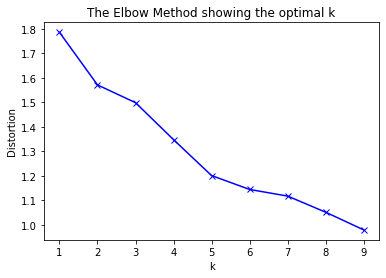

In [124]:
dis = []
K = range(1, 10)

for k in K:
    km = KMeans(n_clusters=k)
    km.fit(tra)
    dis.append(sum(np.min(distance.cdist(tra, km.cluster_centers_, 'euclidean'), axis=1)) / tra.shape[0])
    
plt.plot(K, dis, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [125]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(tra)
y_kmeans = kmeans.predict(tra)

In [126]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [127]:
l = {}
for i in channels:
    if i in l:
        l[i] += 1
    else:
        l[i] = 1
print(l)

{2: 142, 1: 298}


In [128]:
l = {}
for i in y_kmeans:
    if i + 1 in l:
        l[i + 1] += 1
    else:
        l[i + 1] = 1
print(l)

{1: 391, 2: 49}


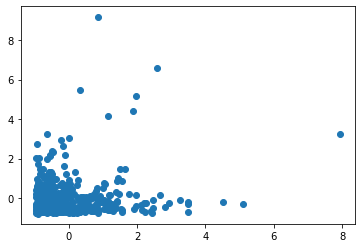

In [129]:
plt.scatter(tra[:, 0], tra[:, 1])

In [130]:
tra

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [131]:
print(kmeans.cluster_centers_)

[[ 0.00280244 -0.23920409 -0.25936746 -0.03395237 -0.24524409 -0.09786508]
 [-0.0223623   1.90875103  2.0696465   0.27092606  1.95694778  0.78092337]]


In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(tra)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [133]:
principalDf

,principal component 1,principal component 2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
...,...,...
435,0.870602,2.220845
436,-0.902520,1.676916
437,3.465704,-1.039838
438,-0.918023,-0.030047


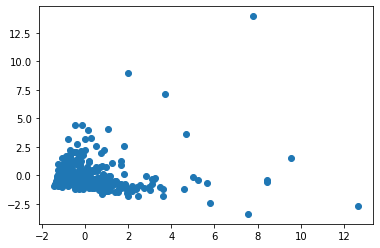

In [134]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [135]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(principalDf)
y_kmeans = kmeans.predict(principalDf)

In [136]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [137]:
l = {}
for i in channels:
    if i in l:
        l[i] += 1
    else:
        l[i] = 1
print(l)

{2: 142, 1: 298}


In [138]:
l = {}
for i in y_kmeans:
    if i + 1 in l:
        l[i + 1] += 1
    else:
        l[i + 1] = 1
print(l)

{1: 395, 2: 45}


In [139]:
print(kmeans.cluster_centers_)

[[-0.41858927  0.04642563]
 [ 3.67428358 -0.40751388]]


In [163]:
target = pd.DataFrame()

In [164]:
target['Channel'] = channels

In [165]:
target

,Channel
0,2
1,2
2,2
3,1
4,2
...,...
435,1
436,1
437,2
438,1


In [187]:
principalDf

,principal component 1,principal component 2
0,0.193291,-0.305100
1,0.434420,-0.328413
2,0.811143,0.815096
3,-0.778648,0.652754
4,0.166287,1.271434
...,...,...
435,0.870602,2.220845
436,-0.902520,1.676916
437,3.465704,-1.039838
438,-0.918023,-0.030047


In [167]:
finalDf = pd.concat([principalDf, target], axis=1)


In [168]:
finalDf

,principal component 1,principal component 2,Channel
0,0.193291,-0.305100,2
1,0.434420,-0.328413,2
2,0.811143,0.815096,2
3,-0.778648,0.652754,1
4,0.166287,1.271434,2
...,...,...,...
435,0.870602,2.220845,1
436,-0.902520,1.676916,1
437,3.465704,-1.039838,2
438,-0.918023,-0.030047,1


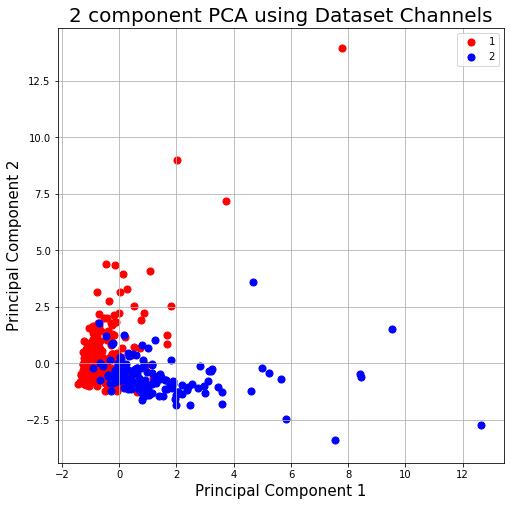

In [169]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA using Dataset Channels', fontsize = 20)
targets = [1, 2]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Channel'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [183]:
target = pd.DataFrame()

In [184]:
target['Channel'] = y_kmeans

In [172]:
finalDf = pd.concat([principalDf, target], axis=1)

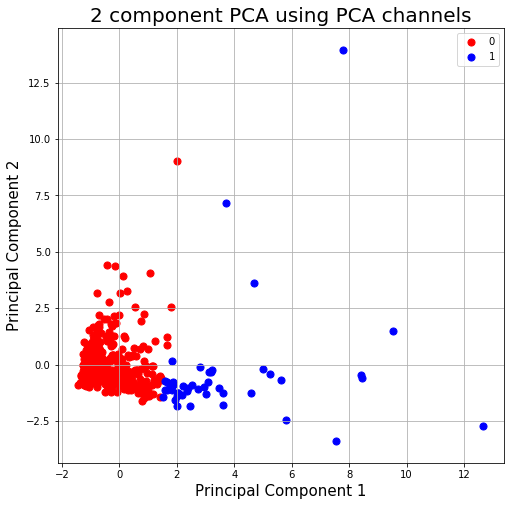

In [173]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA using PCA channels', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Channel'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [240]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(tra)
y_kmeans = kmeans.predict(tra)

In [241]:
target = pd.DataFrame()

In [242]:
test = pd.DataFrame()
test['principal component 1'] = tra[:, 0]
test['principal component 2'] = tra[:, 1]
test

,principal component 1,principal component 2
0,0.052933,0.523568
1,-0.391302,0.544458
2,-0.447029,0.408538
3,0.100111,-0.624020
4,0.840239,-0.052396
...,...,...
435,1.401312,0.848446
436,2.155293,-0.592142
437,0.200326,1.314671
438,-0.135384,-0.517536


In [243]:
target['Channel'] = y_kmeans

In [244]:
FinalDf = pd.concat([test, target], axis=1)

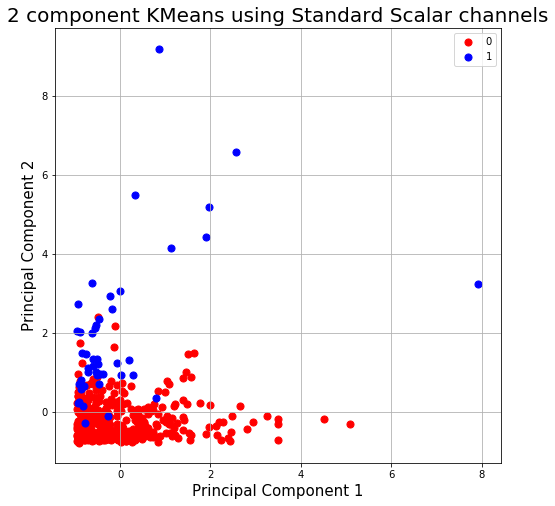

In [246]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component KMeans using Standard Scalar channels', fontsize = 20)
targets = [0, 1]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = FinalDf['Channel'] == target
    ax.scatter(FinalDf.loc[indicesToKeep, 'principal component 1']
               , FinalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()